In [4]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=2c5a667af6477a4ece0368dfa8a15ee8e12433c38573736bcf2eafbf208a0622
  Stored in directory: c:\users\munish kumar\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=e3ffd7adcb89735c3f90b891a47396fcacaea7dade48b6a8277a4406f02d9ee2
  Stored in directory: c:\users\munish kumar\appdata\local\pip\cache\wheels\cc\af\1a\498a24d0730ef484019e007bb9e8cef3ac00311a672c049a3e
Successfully built termcolor absl-py
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing all required libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.preprocessing import StandardScaler # used for feature scaling
import os
from statistics import mode, mean, median

# visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Tranform
from scipy.stats import boxcox
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats

# Models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# Matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, max_error,explained_variance_score

In [2]:
pd.set_option('precision', 4)

In [3]:
# Read CSV File from Data Folder
filename = "cfs_pumf.txt"

# check if data is in current folder. If not, go one step back 
if "data" in os.listdir():
    print("Found data folder")
else:
    os.chdir("../")
    
try:
    dataset = pd.read_csv(f'{os.getcwd()}\\data\\{filename}') 
    print("Dataset is loaded")
except IOError:
    print(f'Could not find the data file {filename}')

Dataset is loaded


In [4]:
# Analyze first and last 10 rows
display("First 10 observations", dataset.head(10))
display("Last 10 observations", dataset.tail(10))

'First 10 observations'

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,25,148,25-148,25,148,25-148,333,2,35,14,2178,11,14,17,N,N,N,N,208.5
1,2,42,428,42-428,6,41740,06-41740,311,3,35,14,344,11,2344,2734,N,N,N,N,193.3
2,3,26,220,26-220,47,314,47-314,322,2,27,4,4197,5134,470,579,N,N,N,N,51.2
3,4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
4,5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1
5,6,24,47900,24-47900,30,99999,30-99999,337,2,40,4,3716,1132,1942,2265,N,Y,C,N,21.9
6,7,19,99999,19-99999,19,99999,19-99999,337,3,26,5,43738,13501,16,22,N,N,N,N,310.5
7,8,6,41740,06-41740,6,99999,06-99999,4239,1,40,14,77,4,272,306,N,N,N,N,138.5
8,9,19,99999,19-99999,19,99999,19-99999,327,3,31,5,338,12826,10,15,N,N,N,N,2695.9
9,10,13,99999,13-99999,13,99999,13-99999,4237,2,34,5,145,22,21,28,N,N,N,N,489.1


'Last 10 observations'

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
4547651,4547652,39,99999,39-99999,39,99999,39-99999,323,2,29,4,247,62,20,29,N,N,N,N,129.5
4547652,4547653,51,40060,51-40060,37,450,37-450,321,3,26,5,3371,26250,158,173,N,N,N,N,280.8
4547653,4547654,19,99999,19-99999,17,99999,17-99999,4234,3,21,5,23587,4718,172,182,N,N,N,N,175.3
4547654,4547655,12,422,12-422,29,99999,29-99999,332,3,33,4,6804,1201,886,1216,N,N,N,N,63.0
4547655,4547656,48,206,48-206,48,206,48-206,4237,3,33,5,1820,38,3,5,N,N,N,N,1679.3
4547656,4547657,9,408,09-408,34,408,34-408,323,4,29,14,7988,133,122,152,N,N,N,N,260.6
4547657,4547658,39,178,39-178,28,99999,28-99999,311,3,05,4,50808,29887,561,683,Y,N,N,N,20.0
4547658,4547659,36,408,36-408,36,408,36-408,336,4,36,5,685,137,13,16,N,N,N,N,164.3
4547659,4547660,48,12420,48-12420,48,12420,48-12420,4233,3,33,5,915,1240,20,22,N,N,N,N,1059.9
4547660,4547661,30,99999,30-99999,30,99999,30-99999,325,1,23,4,22482,75952,12,12,N,N,N,N,66.1


In [5]:
# Setting Shipment Id as the index for the dataset
is_dupliate_In_Shipment_Id = dataset['SHIPMT_ID'].duplicated().any()
print(is_dupliate_In_Shipment_Id)
del is_dupliate_In_Shipment_Id
dataset.set_index('SHIPMT_ID',inplace=True)

False


In [6]:
# dropping EXPORT_YN=='Y', inconsistency in data where EXPORT_YN=='Y', incorrect destination and distance.
dataset = dataset[dataset['EXPORT_YN'] == 'N']

# Reason for filtering this columns with N
dataset[['EXPORT_CNTRY', 'EXPORT_YN']].nunique()


EXPORT_CNTRY    1
EXPORT_YN       1
dtype: int64

In [7]:
# Removing ORIG_CFS_AREA and DEST_CFS_AREA as these columsn are derived from
dataset.drop(['ORIG_CFS_AREA', 'DEST_CFS_AREA', 'EXPORT_CNTRY', 'EXPORT_YN', 'NAICS'], axis=1, inplace = True)

# Reason for dropping these columns

In [8]:
# Analyze the datatype of all the variables and convert to appropriate one
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361940 entries, 1 to 4547661
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ORIG_STATE          int64  
 1   ORIG_MA             int64  
 2   DEST_STATE          int64  
 3   DEST_MA             int64  
 4   QUARTER             int64  
 5   SCTG                object 
 6   MODE                int64  
 7   SHIPMT_VALUE        int64  
 8   SHIPMT_WGHT         int64  
 9   SHIPMT_DIST_GC      int64  
 10  SHIPMT_DIST_ROUTED  int64  
 11  TEMP_CNTL_YN        object 
 12  HAZMAT              object 
 13  WGT_FACTOR          float64
dtypes: float64(1), int64(10), object(3)
memory usage: 499.2+ MB


In [9]:
#Convert datatype of below variables to appropriate one
dataset.ORIG_STATE = dataset.ORIG_STATE.astype(str)
dataset.ORIG_MA = dataset.ORIG_MA.astype(str)
dataset.DEST_STATE = dataset.DEST_STATE.astype(str)
dataset.DEST_MA = dataset.DEST_MA.astype(str)
dataset.QUARTER = dataset.QUARTER.astype(str)
dataset.MODE = dataset.MODE.astype(str)

# Verify dataset again
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361940 entries, 1 to 4547661
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ORIG_STATE          object 
 1   ORIG_MA             object 
 2   DEST_STATE          object 
 3   DEST_MA             object 
 4   QUARTER             object 
 5   SCTG                object 
 6   MODE                object 
 7   SHIPMT_VALUE        int64  
 8   SHIPMT_WGHT         int64  
 9   SHIPMT_DIST_GC      int64  
 10  SHIPMT_DIST_ROUTED  int64  
 11  TEMP_CNTL_YN        object 
 12  HAZMAT              object 
 13  WGT_FACTOR          float64
dtypes: float64(1), int64(4), object(9)
memory usage: 499.2+ MB


# Preprocessing for Categorical Variables

In [10]:
#Create and Analyze Cross table for categorical variables
for col in dataset.columns:
    if str(dataset[col].dtype) in ["str", "object"]:
        print(f'{col}:\n      {dataset[col].unique()}')

ORIG_STATE:
      ['25' '42' '26' '20' '12' '19' '6' '13' '55' '39' '33' '31' '54' '32' '9'
 '17' '37' '48' '18' '29' '49' '36' '27' '53' '47' '34' '5' '38' '56' '1'
 '51' '23' '45' '8' '35' '4' '21' '28' '41' '44' '2' '16' '40' '46' '22'
 '15' '30' '24' '10' '50' '11' '0']
ORIG_MA:
      ['148' '428' '220' '556' '99999' '41740' '184' '332' '408' '450' '172'
 '176' '348' '476' '482' '122' '104' '378' '370' '41700' '440' '400' '368'
 '420' '206' '268' '545' '312' '376' '40060' '142' '216' '25540' '38060'
 '350' '430' '266' '294' '178' '300' '488' '0' '472' '238' '416' '47900'
 '260' '288' '212' '273' '12940' '536' '500' '160' '464' '198' '45300'
 '538' '406' '46520' '12580' '258' '380' '422' '314' '12420' '496' '29340'
 '13140' '16700' '29700' '204']
DEST_STATE:
      ['25' '6' '47' '20' '12' '19' '13' '36' '42' '34' '31' '27' '39' '51' '48'
 '37' '55' '17' '49' '44' '18' '29' '1' '26' '9' '54' '32' '38' '40' '23'
 '45' '28' '8' '56' '4' '53' '21' '24' '33' '41' '2' '5' '22' '46' '16'
 

In [11]:
# Defining 0(ORIG_STATE, ORIG_MA, MODE), 00(SCTG) , 104(ORIG_MA,DEST_MA) and 99(SCTG) as Missing for ORIG_STATE, 
# ORIG_MA, DEST_MA, SCTG, MODE. 

def definingNA(x):
    if (x in ('0','00','99','104')):
        x = ""
    else:
        return x

#Defining supressed values '0','00','99' as Missing. 
dataset['ORIG_STATE']=dataset['ORIG_STATE'].apply(definingNA)
dataset['ORIG_MA']=dataset['ORIG_MA'].apply(definingNA)
dataset['DEST_MA']=dataset['DEST_MA'].apply(definingNA)
dataset['SCTG']=dataset['SCTG'].apply(definingNA)
dataset['MODE']=dataset['MODE'].apply(definingNA)

In [12]:
# Number of missing/invalid values in categorical data
print("Count of missing values in Categorical Variables")
print(dataset[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'TEMP_CNTL_YN', 'HAZMAT']].isna().sum())

Count of missing values in Categorical Variables
ORIG_STATE         26
ORIG_MA         28917
DEST_STATE          0
DEST_MA         18052
QUARTER             0
SCTG              569
MODE              555
TEMP_CNTL_YN        0
HAZMAT              0
dtype: int64


In [13]:
# less than 1% of data is missing, we can drop all rows with missing values
dataset.dropna(inplace=True)

# Verify Number of missing values in categorical data to be zero
print("Count of missing values in Categorical Variables")
print(dataset[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'TEMP_CNTL_YN', 'HAZMAT']].isna().sum())

Count of missing values in Categorical Variables
ORIG_STATE      0
ORIG_MA         0
DEST_STATE      0
DEST_MA         0
QUARTER         0
SCTG            0
MODE            0
TEMP_CNTL_YN    0
HAZMAT          0
dtype: int64


In [14]:
# As SCTG contains inconsistent data, hence imputing industries name into new variable SCTG_Group
# converting SCTG codes to INDUSTRIES, refering STATS CAN website
# https://www150.statcan.gc.ca/n1/pub/50-503-x/50-503-x2018001-eng.htm

def SCTG_IND(SCTG):
    if SCTG in ('01', '01-05', '02', '03', '04', '05'):
        return 'AGRI'
    elif SCTG in ('06', '06-09', '07','08', '09'):
        return 'FOOD'
    elif SCTG in ('10', '10-14', '11', '12', '13', '14'): 
        return 'MNRLS'
    elif SCTG in ('15', '15-19','17', '18', '19'):
        return 'FUEL'
    elif SCTG in ('20', '20-24', '21', '22', '23', '24'):
        return 'PLCHM'
    elif SCTG in ('25','25-30', '26', '27', '28', '29'):
        return 'FRPAP'
    elif SCTG in ('31', '31-34', '32', '33'):
        return 'BMETL'
    elif SCTG in ('35-38', '36', '37', '38'):
        return 'TRANS'
    elif SCTG =='41':
        return 'WASTE'
    elif SCTG in ('30','34','35','39','39-99'):
        return 'OTHMF'
    elif SCTG in ('40','43'):
        return 'MISC'

In [15]:
# converting SCTG codes to INDUSTRIES, refering STATS CAN website
dataset['SCTG_GROUP'] = dataset['SCTG'].apply(SCTG_IND)

In [16]:
# Analyze unique values from SCTG_GROUP
dataset['SCTG_GROUP'].unique()

array(['OTHMF', 'FRPAP', 'BMETL', 'MISC', 'PLCHM', 'AGRI', 'TRANS',
       'FUEL', 'MNRLS', 'FOOD', 'WASTE'], dtype=object)

In [17]:
# dropping SCTG=='MISC' due to inconsistency in data, 'miscellaneous' SCTG values will affect the SHIPMENT VALUES and WEIGHT 
dataset = dataset[dataset['SCTG_GROUP'] != 'MISC']

dataset['SCTG_GROUP'].unique()

array(['OTHMF', 'FRPAP', 'BMETL', 'PLCHM', 'AGRI', 'TRANS', 'FUEL',
       'MNRLS', 'FOOD', 'WASTE'], dtype=object)

In [18]:
dataset.drop(['SCTG'], axis=1, inplace = True)

In [19]:
dataset=dataset[(dataset['SCTG_GROUP']=='AGRI') | (dataset['SCTG_GROUP']=='FOOD') | 
        (dataset['SCTG_GROUP']=='FUEL') | (dataset['SCTG_GROUP']=='PLCHM')]

# Preprocessing for Quantitative Variables

Mean                           >>> 21177.02900481638
Median                         >>> 1419.0
Mode                           >>> 0    32
dtype: int64
Standard Deviation             >>> 364518.1525370857
Maxiumn                        >>> 58737900
Minimum                        >>> 1
Skewness                       >>> 75.8993371095692


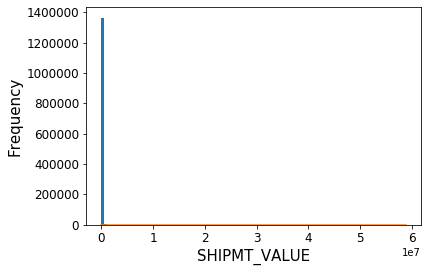

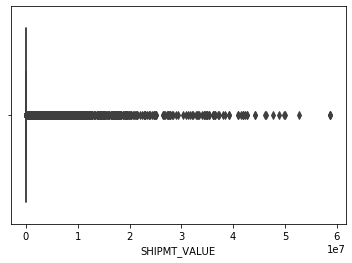

In [20]:
# Check statistics for SHIPMT_VALUE
# Analyze SHIPMT_VALUE for distribution, Outliers and Skewness
dataset["SHIPMT_VALUE"] = dataset["SHIPMT_VALUE"]

# Statistics for SHIPMT_VALUE
print(f'{"Mean":30s} >>> {dataset["SHIPMT_VALUE"].mean()}')
print(f'{"Median":30s} >>> {dataset["SHIPMT_VALUE"].median()}')
print(f'{"Mode":30s} >>> {dataset["SHIPMT_VALUE"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["SHIPMT_VALUE"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["SHIPMT_VALUE"].max()}')
print(f'{"Minimum":30s} >>> {dataset["SHIPMT_VALUE"].min()}')
print(f'{"Skewness":30s} >>> {dataset["SHIPMT_VALUE"].skew()}')

# Check for distribution
dataset["SHIPMT_VALUE"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["SHIPMT_VALUE"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["SHIPMT_VALUE"])

In [21]:
# As the data is highly skewed, team decided to remove outliers
dataset = dataset[(dataset['SHIPMT_VALUE']>100) & (dataset['SHIPMT_VALUE']<1000000)]

Mean                           >>> 66480.41222651622
Median                         >>> 1842.0
Mode                           >>> 0    1
dtype: int64
Standard Deviation             >>> 1210623.9292764526
Maxiumn                        >>> 277029600
Minimum                        >>> 1
Skewness                       >>> 48.49553346960931


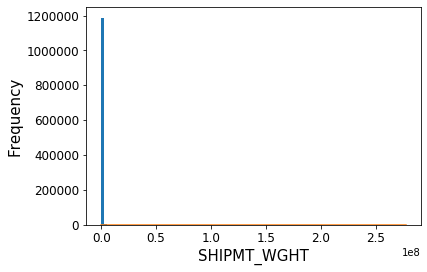

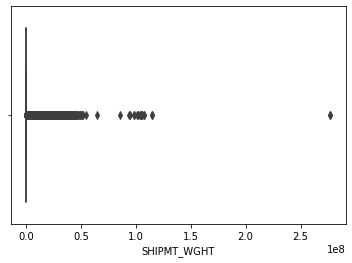

In [22]:
# Analyze shipment weight
dataset["SHIPMT_WGHT"] = dataset["SHIPMT_WGHT"]

# Statistics for SHIPMT_WGHT
print(f'{"Mean":30s} >>> {dataset["SHIPMT_WGHT"].mean()}')
print(f'{"Median":30s} >>> {dataset["SHIPMT_WGHT"].median()}')
print(f'{"Mode":30s} >>> {dataset["SHIPMT_WGHT"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["SHIPMT_WGHT"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["SHIPMT_WGHT"].max()}')
print(f'{"Minimum":30s} >>> {dataset["SHIPMT_WGHT"].min()}')
print(f'{"Skewness":30s} >>> {dataset["SHIPMT_WGHT"].skew()}')

# Check for distribution
dataset["SHIPMT_WGHT"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["SHIPMT_WGHT"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["SHIPMT_WGHT"])

Mean                           >>> 278.5806245236332
Median                         >>> 56.0
Mode                           >>> 0    3
dtype: int64
Standard Deviation             >>> 478.71562670077657
Maxiumn                        >>> 5153
Minimum                        >>> 1
Skewness                       >>> 2.702101649746842


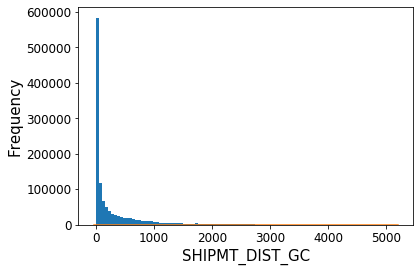

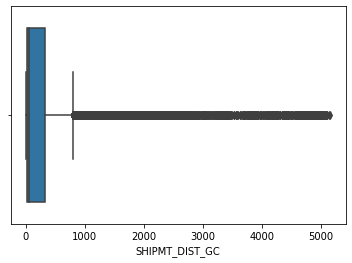

In [23]:
# Analyze Shipmen Dist gc
dataset["SHIPMT_DIST_GC"] = dataset["SHIPMT_DIST_GC"]

# Statistics for SHIPMT_DIST_GC
print(f'{"Mean":30s} >>> {dataset["SHIPMT_DIST_GC"].mean()}')
print(f'{"Median":30s} >>> {dataset["SHIPMT_DIST_GC"].median()}')
print(f'{"Mode":30s} >>> {dataset["SHIPMT_DIST_GC"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["SHIPMT_DIST_GC"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["SHIPMT_DIST_GC"].max()}')
print(f'{"Minimum":30s} >>> {dataset["SHIPMT_DIST_GC"].min()}')
print(f'{"Skewness":30s} >>> {dataset["SHIPMT_DIST_GC"].skew()}')

# Check for distribution
dataset["SHIPMT_DIST_GC"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["SHIPMT_DIST_GC"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["SHIPMT_DIST_GC"])

Mean                           >>> 340.07432285696797
Median                         >>> 70.0
Mode                           >>> 0    4
dtype: int64
Standard Deviation             >>> 573.061542033498
Maxiumn                        >>> 5596
Minimum                        >>> 1
Skewness                       >>> 2.5458867251789377


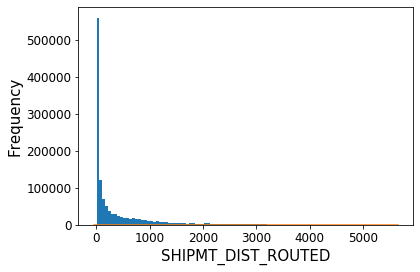

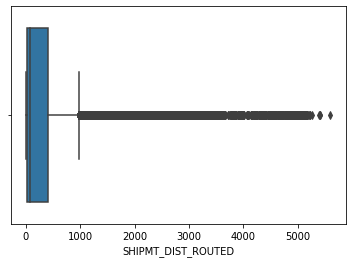

In [24]:
# Analyze Shipment dist routed
dataset["SHIPMT_DIST_ROUTED"] = dataset["SHIPMT_DIST_ROUTED"]

# Statistics for SHIPMT_DIST_ROUTED
print(f'{"Mean":30s} >>> {dataset["SHIPMT_DIST_ROUTED"].mean()}')
print(f'{"Median":30s} >>> {dataset["SHIPMT_DIST_ROUTED"].median()}')
print(f'{"Mode":30s} >>> {dataset["SHIPMT_DIST_ROUTED"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["SHIPMT_DIST_ROUTED"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["SHIPMT_DIST_ROUTED"].max()}')
print(f'{"Minimum":30s} >>> {dataset["SHIPMT_DIST_ROUTED"].min()}')
print(f'{"Skewness":30s} >>> {dataset["SHIPMT_DIST_ROUTED"].skew()}')

# Check for distribution
dataset["SHIPMT_DIST_ROUTED"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["SHIPMT_DIST_ROUTED"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["SHIPMT_DIST_ROUTED"])

Mean                           >>> 1187.6517069546658
Median                         >>> 245.4
Mode                           >>> 0    17.6
dtype: float64
Standard Deviation             >>> 8207.183530192078
Maxiumn                        >>> 975000.0
Minimum                        >>> 0.6
Skewness                       >>> 69.15215222060169


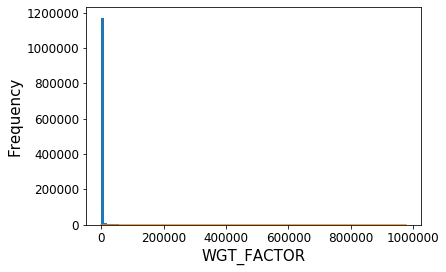

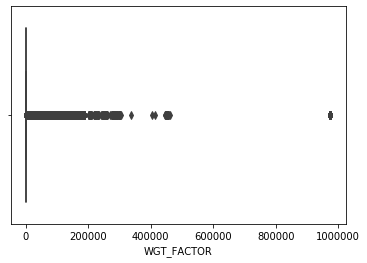

In [25]:
# Analyze Weight Factor
dataset["WGT_FACTOR"] = dataset["WGT_FACTOR"]

# Statistics for WGT_FACTOR
print(f'{"Mean":30s} >>> {dataset["WGT_FACTOR"].mean()}')
print(f'{"Median":30s} >>> {dataset["WGT_FACTOR"].median()}')
print(f'{"Mode":30s} >>> {dataset["WGT_FACTOR"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["WGT_FACTOR"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["WGT_FACTOR"].max()}')
print(f'{"Minimum":30s} >>> {dataset["WGT_FACTOR"].min()}')
print(f'{"Skewness":30s} >>> {dataset["WGT_FACTOR"].skew()}')

# Check for distribution
dataset["WGT_FACTOR"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["WGT_FACTOR"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["WGT_FACTOR"])

In [26]:
dataset.WGT_FACTOR.count()

1192621

In [27]:
dataset.shape

(1192621, 14)

In [28]:
# Analyze first and last 10 rows
display("First 10 observations", dataset.head(10))
display("Last 10 observations", dataset.tail(10))

'First 10 observations'

,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,WGT_FACTOR,SCTG_GROUP
SHIPMT_ID,,,,,,,,,,,,,,
12,39,184,42,99999,2,4,7543,3960,105,143,N,N,77.2,PLCHM
13,33,148,34,408,1,14,1159,3,218,241,N,N,570.2,PLCHM
14,31,99999,31,99999,1,4,1422,49037,14,14,N,N,535.2,AGRI
21,54,99999,39,184,2,4,2534,3223,217,262,N,N,70.0,PLCHM
25,48,99999,48,99999,1,4,26498,33269,156,219,Y,N,114.3,AGRI
33,13,122,13,122,2,5,539,1026,60,73,Y,N,747.4,AGRI
34,42,99999,44,148,4,4,15422,9947,320,376,N,N,96.1,PLCHM
35,18,176,18,176,1,5,248,473,8,8,N,H,183.1,FUEL
40,18,176,18,176,1,5,635,1159,27,30,N,H,146.2,FUEL


'Last 10 observations'

,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,WGT_FACTOR,SCTG_GROUP
SHIPMT_ID,,,,,,,,,,,,,,
4547621,42,428,51,545,1,14,3664,95,231,339,N,N,661.4,PLCHM
4547623,34,408,46,99999,2,14,1425,56,1485,1698,N,N,511.5,PLCHM
4547626,1,380,1,380,4,5,2812,7600,2,3,N,H,510.7,PLCHM
4547627,39,184,39,184,1,5,236,274,10,12,Y,H,1925.1,FUEL
4547634,53,99999,53,99999,3,5,765,578,61,76,N,N,113.8,PLCHM
4547642,23,99999,25,148,2,5,3483,518,56,62,Y,N,100.0,AGRI
4547651,17,176,17,176,1,4,44169,31500,30,50,N,N,198.8,FOOD
4547654,19,99999,17,99999,3,5,23587,4718,172,182,N,N,175.3,PLCHM
4547658,39,178,28,99999,3,4,50808,29887,561,683,Y,N,20.0,AGRI


# Correlation and association analysis

AxesSubplot(0.241667,0.125;0.503333x0.755)


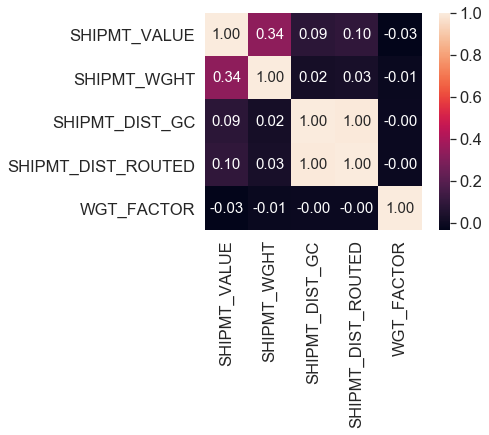

In [62]:
# Correlation for Quantative variables
# Calculate and show correlation matrix
corr = dataset[['SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC', 'SHIPMT_DIST_ROUTED', 'WGT_FACTOR']]
cm = np.corrcoef(corr.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=corr.columns,
                xticklabels=corr.columns)

print(hm)
# Removing the variable to free up the space
del corr
del cm
del hm


In [63]:
dataset.corr(method='pearson')

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,WGT_FACTOR
SHIPMT_VALUE,1.0000,0.3373,0.0851,0.0988,-0.0343
SHIPMT_WGHT,0.3373,1.0000,0.0223,0.0318,-0.0071
SHIPMT_DIST_GC,0.0851,0.0223,1.0000,0.9955,-0.0022
SHIPMT_DIST_ROUTED,0.0988,0.0318,0.9955,1.0000,-0.0038
WGT_FACTOR,-0.0343,-0.0071,-0.0022,-0.0038,1.0000


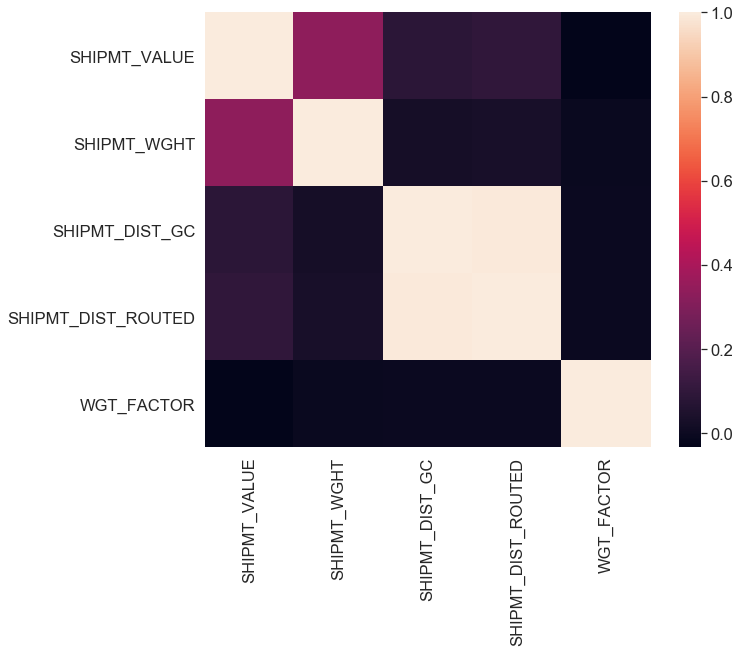

In [64]:
plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr())

In [29]:
# As SHIPMT_DIST_GC and SHIPMT_DIST_ROUTED has a huge correlation, hence removing one of them
dataset.drop(["SHIPMT_DIST_GC"],
            axis = 1,
            inplace = True
            )

# dataset.drop(["SHIPMT_DIST_ROUTED"],
#             axis = 1,
#             inplace = True
#             )

# Transformations

In [30]:
# Prepare dummy variables for all categorical variablces
for featureName in dataset.columns:
    if str(dataset[featureName].dtype) in ["str", "object"]:
        dummies = pd.get_dummies(dataset[featureName], prefix=featureName, prefix_sep = "_", drop_first = True)
        dataset = pd.concat([dataset, dummies], axis=1)
        dataset.drop( featureName, axis = 1, inplace = True)
    else:
        print(f'Feature {featureName} should be categorical')

Feature SHIPMT_VALUE should be categorical
Feature SHIPMT_WGHT should be categorical
Feature SHIPMT_DIST_ROUTED should be categorical
Feature WGT_FACTOR should be categorical


Mean                           >>> 7.8351175077620585
Median                         >>> 7.738488122494646
Mode                           >>> 0    4.6728
dtype: float64
Standard Deviation             >>> 1.9069205513811054
Maxiumn                        >>> 13.81533054176233
Minimum                        >>> 4.624972813284271
Skewness                       >>> 0.22397410020759898


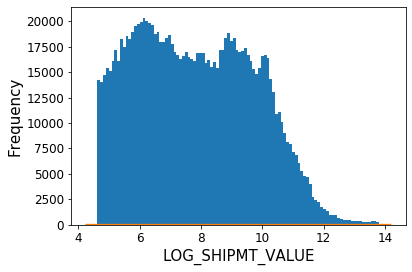

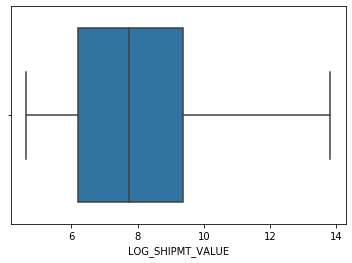

In [31]:
# Tranform data using log method and verify Outlier and skewness
dataset["LOG_SHIPMT_VALUE"] = np.log(dataset["SHIPMT_VALUE"] + 1 )

# Statistics for SHIPMT_VALUE
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_VALUE"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_VALUE"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_VALUE"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_VALUE"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_VALUE"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_VALUE"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_VALUE"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_VALUE"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_VALUE"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_VALUE"])

Mean                           >>> 7.503273463914624
Median                         >>> 7.519149957669823
Mode                           >>> 0    0.6931
dtype: float64
Standard Deviation             >>> 2.8472043447451045
Maxiumn                        >>> 19.439634921258072
Minimum                        >>> 0.6931471805599453
Skewness                       >>> -0.2690448246662025


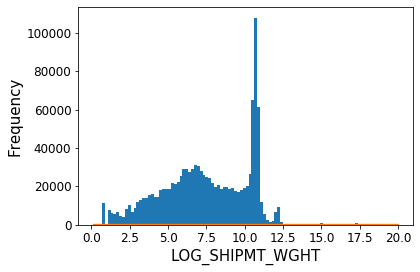

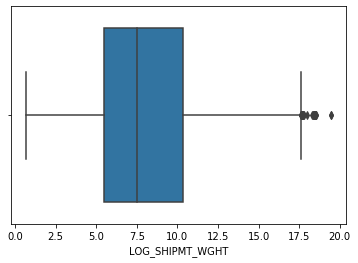

In [32]:
# Tranform data using boxcox method and verify
dataset["LOG_SHIPMT_WGHT"] = np.log(dataset["SHIPMT_WGHT"] + 1)

# Statistics for SHIPMT_WGHT
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_WGHT"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_WGHT"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_WGHT"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_WGHT"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_WGHT"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_WGHT"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_WGHT"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_WGHT"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_WGHT"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_WGHT"])

In [33]:
if "SHIPMT_DIST_GC" in dataset.columns:
    # Tranform data using boxcox method and verify
    dataset["LOG_SHIPMT_DIST_GC"] = np.log(dataset["SHIPMT_DIST_GC"] + 1)

    # Statistics for SHIPMT_DIST_GC
    print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].mean()}')
    print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].median()}')
    print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].mode()}')
    print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].std()}')
    print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].max()}')
    print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].min()}')
    print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].skew()}')

    # Check for distribution
    dataset["LOG_SHIPMT_DIST_GC"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
    plt.xlabel("Life Expectancy", fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    sns.distplot(dataset["LOG_SHIPMT_DIST_GC"])
    plt.show()

    # Check for outliers
    sns.boxplot(x=dataset["LOG_SHIPMT_DIST_GC"])

Mean                           >>> 4.409859194045095
Median                         >>> 4.2626798770413155
Mode                           >>> 0    1.6094
dtype: float64
Standard Deviation             >>> 1.8396022159881582
Maxiumn                        >>> 8.62998601889136
Minimum                        >>> 0.6931471805599453
Skewness                       >>> 0.13470421801338864


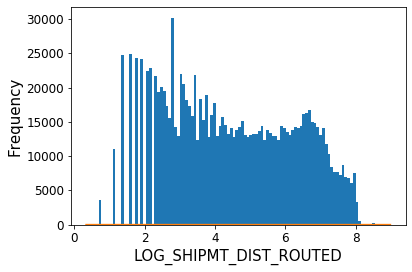

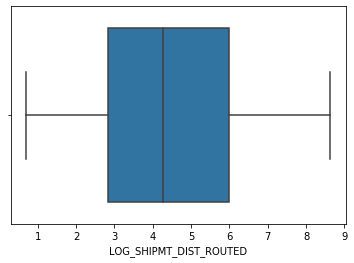

In [34]:
if "SHIPMT_DIST_ROUTED" in dataset.columns:
    # Tranform data using boxcox method and verify
    dataset["LOG_SHIPMT_DIST_ROUTED"] = np.log(dataset["SHIPMT_DIST_ROUTED"] + 1)

    # Statistics for SHIPMT_DIST_ROUTED
    print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].mean()}')
    print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].median()}')
    print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].mode()}')
    print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].std()}')
    print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].max()}')
    print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].min()}')
    print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].skew()}')

    # Check for distribution
    dataset["LOG_SHIPMT_DIST_ROUTED"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
    plt.xlabel("Life Expectancy", fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    sns.distplot(dataset["LOG_SHIPMT_DIST_ROUTED"])
    plt.show()

    # Check for outliers
    sns.boxplot(x=dataset["LOG_SHIPMT_DIST_ROUTED"])

Mean                           >>> 5.57544582435555
Median                         >>> 5.502889532276811
Mode                           >>> 0    2.8679
dtype: float64
Standard Deviation             >>> 1.6028187636883846
Maxiumn                        >>> 13.790192749979985
Minimum                        >>> -0.5108256237659907
Skewness                       >>> 0.2720131296393699


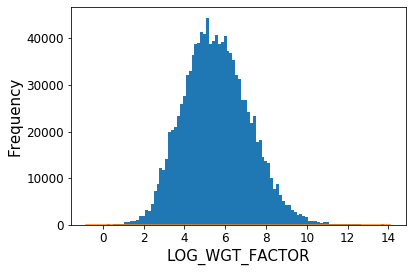

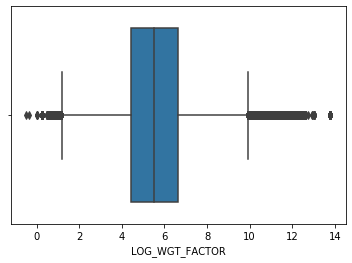

In [35]:
# Tranform data using boxcox method and verify
dataset["LOG_WGT_FACTOR"] = np.log(dataset["WGT_FACTOR"])

# Statistics for WGT_FACTOR
print(f'{"Mean":30s} >>> {dataset["LOG_WGT_FACTOR"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_WGT_FACTOR"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_WGT_FACTOR"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_WGT_FACTOR"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_WGT_FACTOR"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_WGT_FACTOR"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_WGT_FACTOR"].skew()}')

# Check for distribution
dataset["LOG_WGT_FACTOR"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_WGT_FACTOR"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_WGT_FACTOR"])

In [36]:
# Removing original features for which transformation is done
# dataset.drop(["SHIPMT_VALUE", "SHIPMT_WGHT", "SHIPMT_DIST_GC", "WGT_FACTOR"],
#             axis = 1,
#             inplace = True
#             )


dataset.drop(["SHIPMT_VALUE", "SHIPMT_WGHT", "SHIPMT_DIST_ROUTED", "WGT_FACTOR"],
            axis = 1,
            inplace = True
            )

In [37]:
dataset.shape

(1192621, 268)

In [38]:
dataset.head()

,ORIG_STATE_10,ORIG_STATE_11,ORIG_STATE_12,ORIG_STATE_13,ORIG_STATE_15,ORIG_STATE_16,ORIG_STATE_17,ORIG_STATE_18,ORIG_STATE_19,ORIG_STATE_2,...,TEMP_CNTL_YN_Y,HAZMAT_N,HAZMAT_P,SCTG_GROUP_FOOD,SCTG_GROUP_FUEL,SCTG_GROUP_PLCHM,LOG_SHIPMT_VALUE,LOG_SHIPMT_WGHT,LOG_SHIPMT_DIST_ROUTED,LOG_WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,,,,,,,,
12,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,8.9285,8.2843,4.9698,4.3464
13,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,7.0562,1.3863,5.4889,6.3460
14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,7.2605,10.8004,2.7081,6.2826
21,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,7.8379,8.0784,5.5722,4.2485
25,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,10.1849,10.4124,5.3936,4.7388


In [39]:
# # Export dataset
# dataset.to_csv("exported_data.txt")

In [65]:
sample_Dataset = dataset.sample(frac = 0.40, random_state = 3456)

In [66]:
sample_Dataset.shape

(477048, 268)

# Modelling

In [67]:
# Split Traing and Test data

# Without Transformation
# target = dataset.SHIPMT_VALUE
# inputs = dataset.drop(columns = ['SHIPMT_VALUE'])
# inputs.columns

# With Transformation
target = sample_Dataset.LOG_SHIPMT_VALUE
inputs = sample_Dataset.drop(columns = ['LOG_SHIPMT_VALUE'])
inputs.columns

Index(['ORIG_STATE_10', 'ORIG_STATE_11', 'ORIG_STATE_12', 'ORIG_STATE_13',
       'ORIG_STATE_15', 'ORIG_STATE_16', 'ORIG_STATE_17', 'ORIG_STATE_18',
       'ORIG_STATE_19', 'ORIG_STATE_2',
       ...
       'MODE_8', 'TEMP_CNTL_YN_Y', 'HAZMAT_N', 'HAZMAT_P', 'SCTG_GROUP_FOOD',
       'SCTG_GROUP_FUEL', 'SCTG_GROUP_PLCHM', 'LOG_SHIPMT_WGHT',
       'LOG_SHIPMT_DIST_ROUTED', 'LOG_WGT_FACTOR'],
      dtype='object', length=267)

In [68]:
# metrics function
def calculate_performance_matrix(y_true, y_pred, dataType, inverseValue = True):
    score = r2_score(y_true, y_pred)
    if inverseValue:
        y_true = (np.exp(y_true)-1)
        y_pred =  (np.exp(y_pred)-1)
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    max_error_ = max_error(y_true, y_pred)
    
    matrix = {dataType + '_mean_absolute_error':  [mae],
              dataType + '_mean_squared_error': [mse],
              dataType + '_r2_score': [score],
              dataType + '_max_error': [max_error_]
             }

    return pd.DataFrame(matrix)

# Split Train and Test 80:20 ratio

In [69]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(inputs, target, test_size = 0.2, random_state = 12345)

# Mulitple Linear regression

In [45]:
# Munish
# Fit Regression Model
regressor = LinearRegression(fit_intercept  = True, normalize = True)
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [46]:
# Predicting the Test set results
Y_Train_Pred = regressor.predict(X_Train)
Y_Test_Pred = regressor.predict(X_Test)

In [47]:
display("Evaluate result for MLA")
display(calculate_performance_matrix(Y_Train, Y_Train_Pred, "train"))
display(calculate_performance_matrix(Y_Test, Y_Test_Pred, "test"))

'Evaluate result for MLA'

,train_mean_absolute_error,train_mean_squared_error,train_r2_score,train_max_error
0,9087.5839,1.2437e+09,0.7023,987547.6339


,test_mean_absolute_error,test_mean_squared_error,test_r2_score,test_max_error
0,9138.6761,1.3096e+09,0.7,963312.985


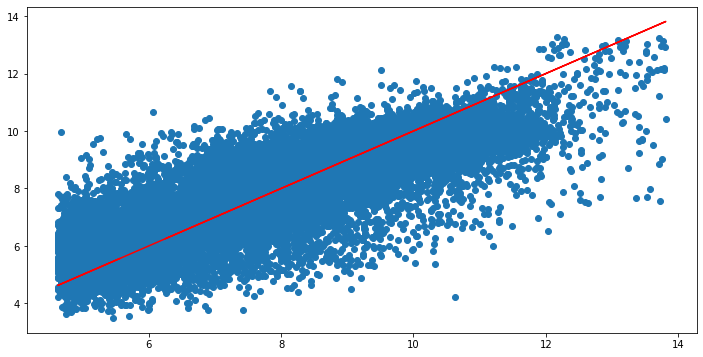

In [51]:
plt.figure(figsize=(12,6))
plt.scatter(Y_Test,Y_Test_Pred)
plt.plot(Y_Test,Y_Test,color='red')

# Random Forest Regressor

In [72]:
# Shikhir
# Develop Random Forest Regressor Model


random_forest_regressor= RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=50,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False)


random_forest_regressor.fit(X_Train, Y_Train);

In [73]:
# Predicting the Train and Test set results
rft_Y_Train_Pred = random_forest_regressor.predict(X_Train)
rft_Y_Test_Pred = random_forest_regressor.predict(X_Test)

In [74]:
display("Evaluate result for Random Forest")
display(calculate_performance_matrix(Y_Train, rft_Y_Train_Pred, "train"))
display(calculate_performance_matrix(Y_Test, rft_Y_Test_Pred, "test"))

'Evaluate result for MLA'

,train_mean_absolute_error,train_mean_squared_error,train_r2_score,train_max_error
0,2407.9524,2.1145e+08,0.9758,888284.5195


,test_mean_absolute_error,test_mean_squared_error,test_r2_score,test_max_error
0,4854.8711,5.0609e+08,0.852,934210.4752


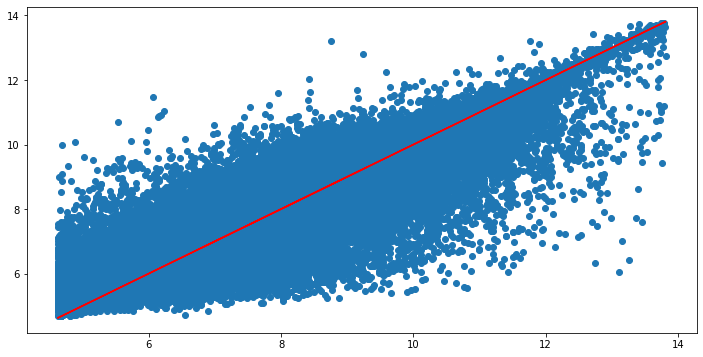

In [75]:
plt.figure(figsize=(12,6))
plt.scatter(Y_Test,rft_Y_Test_Pred)
plt.plot(Y_Test,Y_Test,color='red')

# GradientBoostingRegressor

In [76]:
# Priyanka
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=1, subsample = 0.8, max_depth=4)
gradient_boosting_regressor.fit(X_Train, Y_Train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
# Predicting the Train and Test set results
GBR_Y_Train_Pred = gradient_boosting_regressor.predict(X_Train)
GBR_Y_Test_Pred = gradient_boosting_regressor.predict(X_Test)

In [78]:
display("Evaluate result for Gradient Boosting")
display(calculate_performance_matrix(Y_Train, GBR_Y_Train_Pred, "train"))
display(calculate_performance_matrix(Y_Test, GBR_Y_Test_Pred, "test"))

'Evaluate result for Gradient Boosting'

,train_mean_absolute_error,train_mean_squared_error,train_r2_score,train_max_error
0,7652.9308,1.0669e+09,0.7903,3.4751e+06


,test_mean_absolute_error,test_mean_squared_error,test_r2_score,test_max_error
0,7759.5031,1.1061e+09,0.7798,2.4500e+06


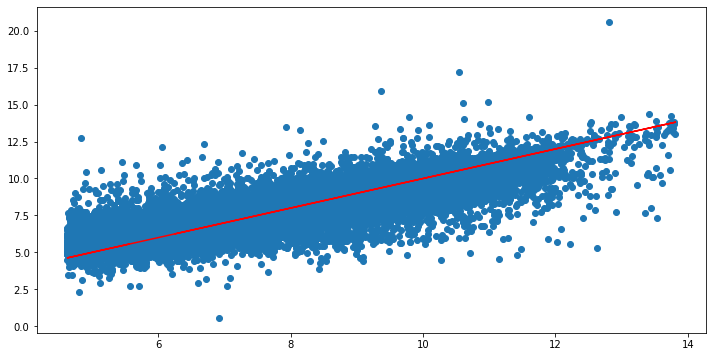

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(Y_Test,GBR_Y_Test_Pred)
plt.plot(Y_Test,Y_Test,color='red')

# Decision Tree Regressor

In [55]:
# Niyati
decision_tree_regressor = DecisionTreeRegressor(criterion='mse', max_depth=16, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')
decision_tree_regressor.fit(X_Train, Y_Train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=16,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
# Predicting the Train and Test set results
dtr_Y_Train_Pred = decision_tree_regressor.predict(X_Train)
dtr_Y_Test_Pred = decision_tree_regressor.predict(X_Test)

In [57]:
tree_scores = cross_val_score(decision_tree_regressor, X_Train, Y_Train,
                              scoring = "neg_mean_squared_error", 
                              cv = 10)

tree_rmse_scores = np.sqrt(-tree_scores)

print("Root mean square error scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Root mean square error scores: [1.02096447 1.03878738 1.05997291 1.03106347 1.04447199 1.05717096
 1.05653465 1.04940475 1.04624884 1.02701682]
Mean: 1.0431636243819469
Standard deviation: 0.01275465053562446


In [58]:
display("Evaluate result for Decision Tree")
display(calculate_performance_matrix(Y_Train, dtr_Y_Train_Pred, "train"))
display(calculate_performance_matrix(Y_Test, dtr_Y_Test_Pred, "test"))

'Evaluate result for MLA'

,train_mean_absolute_error,train_mean_squared_error,train_r2_score,train_max_error
0,9413.9752,1.5413e+09,0.7005,987648.7243


,test_mean_absolute_error,test_mean_squared_error,test_r2_score,test_max_error
0,9469.6001,1.6182e+09,0.6959,971576.4847


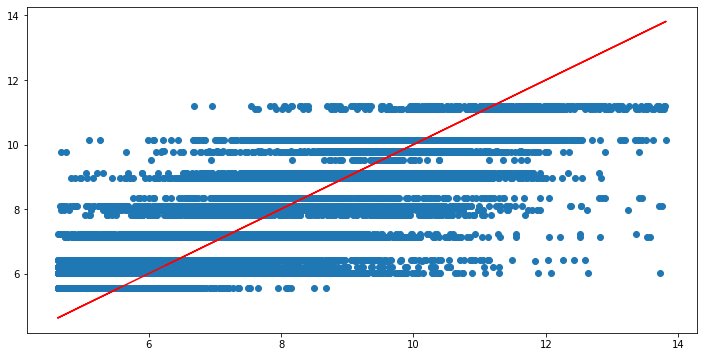

In [59]:
plt.figure(figsize=(12,6))
plt.scatter(Y_Test,dtr_Y_Test_Pred)
plt.plot(Y_Test,Y_Test,color='red')

# Neural Network

In [95]:
target_neural = (sample_Dataset.LOG_SHIPMT_VALUE).values
inputs_neural = (sample_Dataset.drop(columns = ['LOG_SHIPMT_VALUE'])).values
inputs.columns

Index(['ORIG_STATE_10', 'ORIG_STATE_11', 'ORIG_STATE_12', 'ORIG_STATE_13',
       'ORIG_STATE_15', 'ORIG_STATE_16', 'ORIG_STATE_17', 'ORIG_STATE_18',
       'ORIG_STATE_19', 'ORIG_STATE_2',
       ...
       'MODE_8', 'TEMP_CNTL_YN_Y', 'HAZMAT_N', 'HAZMAT_P', 'SCTG_GROUP_FOOD',
       'SCTG_GROUP_FUEL', 'SCTG_GROUP_PLCHM', 'LOG_SHIPMT_WGHT',
       'LOG_SHIPMT_DIST_ROUTED', 'LOG_WGT_FACTOR'],
      dtype='object', length=267)

In [96]:
X_Train_neural, X_Test_neural, Y_Train_neural, Y_Test_neural = train_test_split(inputs_neural, target_neural, 
                                                                                test_size = 0.2, random_state = 12345)

In [97]:
model_NN_3=Sequential()

model_NN_3.add(Dense(268,activation='relu'))
model_NN_3.add(Dense(268,activation='relu'))
model_NN_3.add(Dense(268,activation='relu'))
model_NN_3.add(Dense(268,activation='relu'))

model_NN_3.add(Dense(1))

model_NN_3.compile(optimizer='adam',loss='mse')

In [98]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [99]:
model_NN_3.fit(x=X_Train_neural,y=Y_Train_neural,epochs=200,verbose=1,validation_data=(X_Test_neural,Y_Test_neural),
               batch_size=64,callbacks=[early_stop])

Train on 381638 samples, validate on 95410 samples
Epoch 1/200
381638/381638 [==============================] - 66s 172us/sample - loss: 0.9560 - val_loss: 0.8719
Epoch 2/200
381638/381638 [==============================] - 64s 168us/sample - loss: 0.7839 - val_loss: 0.8418
Epoch 3/200
381638/381638 [==============================] - 59s 154us/sample - loss: 0.7352 - val_loss: 0.7643
Epoch 4/200
381638/381638 [==============================] - 61s 160us/sample - loss: 0.7044 - val_loss: 0.7273
Epoch 5/200
381638/381638 [==============================] - 65s 170us/sample - loss: 0.6798 - val_loss: 0.7049
Epoch 6/200
381638/381638 [==============================] - 61s 159us/sample - loss: 0.6595 - val_loss: 0.7319
Epoch 7/200
381638/381638 [==============================] - 64s 169us/sample - loss: 0.6435 - val_loss: 0.6782
Epoch 8/200
381638/381638 [==============================] - 67s 176us/sample - loss: 0.6285 - val_loss: 0.6777
Epoch 9/200
381638/381638 [==========================

In [101]:
predictions_NN_3_train=model_NN_3.predict(X_Train_neural)
predictions_NN_3_test=model_NN_3.predict(X_Test_neural)

In [103]:
display(calculate_performance_matrix(Y_Test_neural,predictions_NN_3_test,"test"))
display(calculate_performance_matrix(Y_Train_neural,predictions_NN_3_train,"train"))

,test_mean_absolute_error,test_mean_squared_error,test_r2_score,test_max_error
0,6426.1885,6.8773e+08,0.825,929056.125


,train_mean_absolute_error,train_mean_squared_error,train_r2_score,train_max_error
0,5987.703,6.6032e+08,0.869,3323016.5


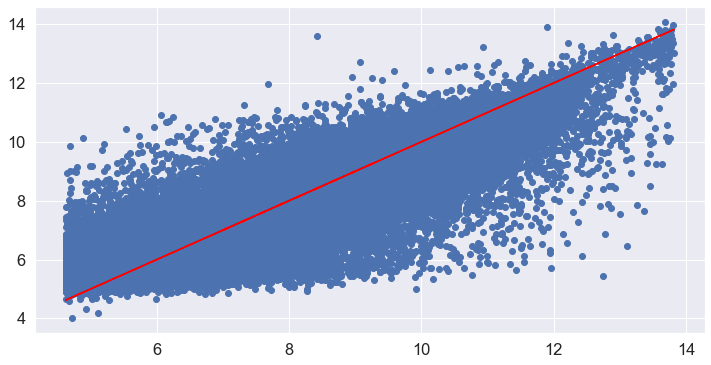

In [104]:
plt.figure(figsize=(12,6))
plt.scatter(Y_Test_neural,predictions_NN_3_test)
plt.plot(Y_Test_neural,Y_Test_neural,color='red')